<a href="https://colab.research.google.com/github/joypatel18/My-Projects/blob/main/Credit_card_fraud_best_model_and_matrix_for_Imbalance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

## Import Data

In [ ]:
try:
    raw_df = pd.read_csv('creditcard.csv')
except:
    raw_df = pd.read_csv('creditcard.csv')


In [ ]:
raw_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0


## Data Set Characteristics

In [ ]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

<ipython-input-7-47126d694031>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




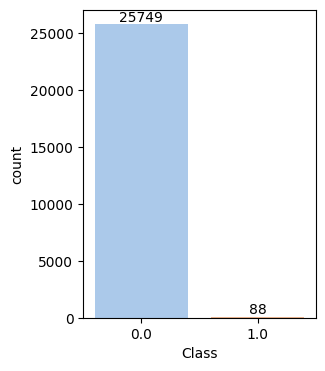

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Genuine:', round(raw_df['Class'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['Class'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 99.66 % of the dataset
Frauds: 0.34 % of the dataset


# Data pre-processing

## Dropping duplicated values

In [ ]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df = df.drop('Time', axis=1)


In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275234,-0.619418,0.822471,-0.818036,1.300766,1.836554,-0.649880,1.963013,-0.438465,-1.168854,-1.042189,...,0.098205,0.291522,-0.099331,-0.598198,0.374619,-0.364733,-0.045905,-0.015786,158.00,0.0
275235,-0.966986,0.015744,1.786483,-2.984102,-1.301897,-0.486245,-0.720859,0.485952,-2.062750,0.297047,...,-0.328532,-0.575590,-0.171412,-0.136203,0.377049,-0.347791,0.182100,0.056142,5.00,0.0
275236,1.799803,-2.314789,-0.715295,-1.461901,-1.766602,-0.037490,-1.317248,-0.038556,-1.102614,1.600628,...,0.267159,0.803152,-0.133821,-0.457007,-0.246877,0.024098,-0.002014,-0.015371,249.00,0.0
275237,1.945100,0.464009,-2.296450,1.384582,1.081907,-0.637361,0.641580,-0.232088,-0.239765,-0.221617,...,0.035312,0.258559,-0.024747,0.600258,0.460521,-0.546479,-0.004511,-0.026952,28.30,0.0


### Checking for outliers

In [ ]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

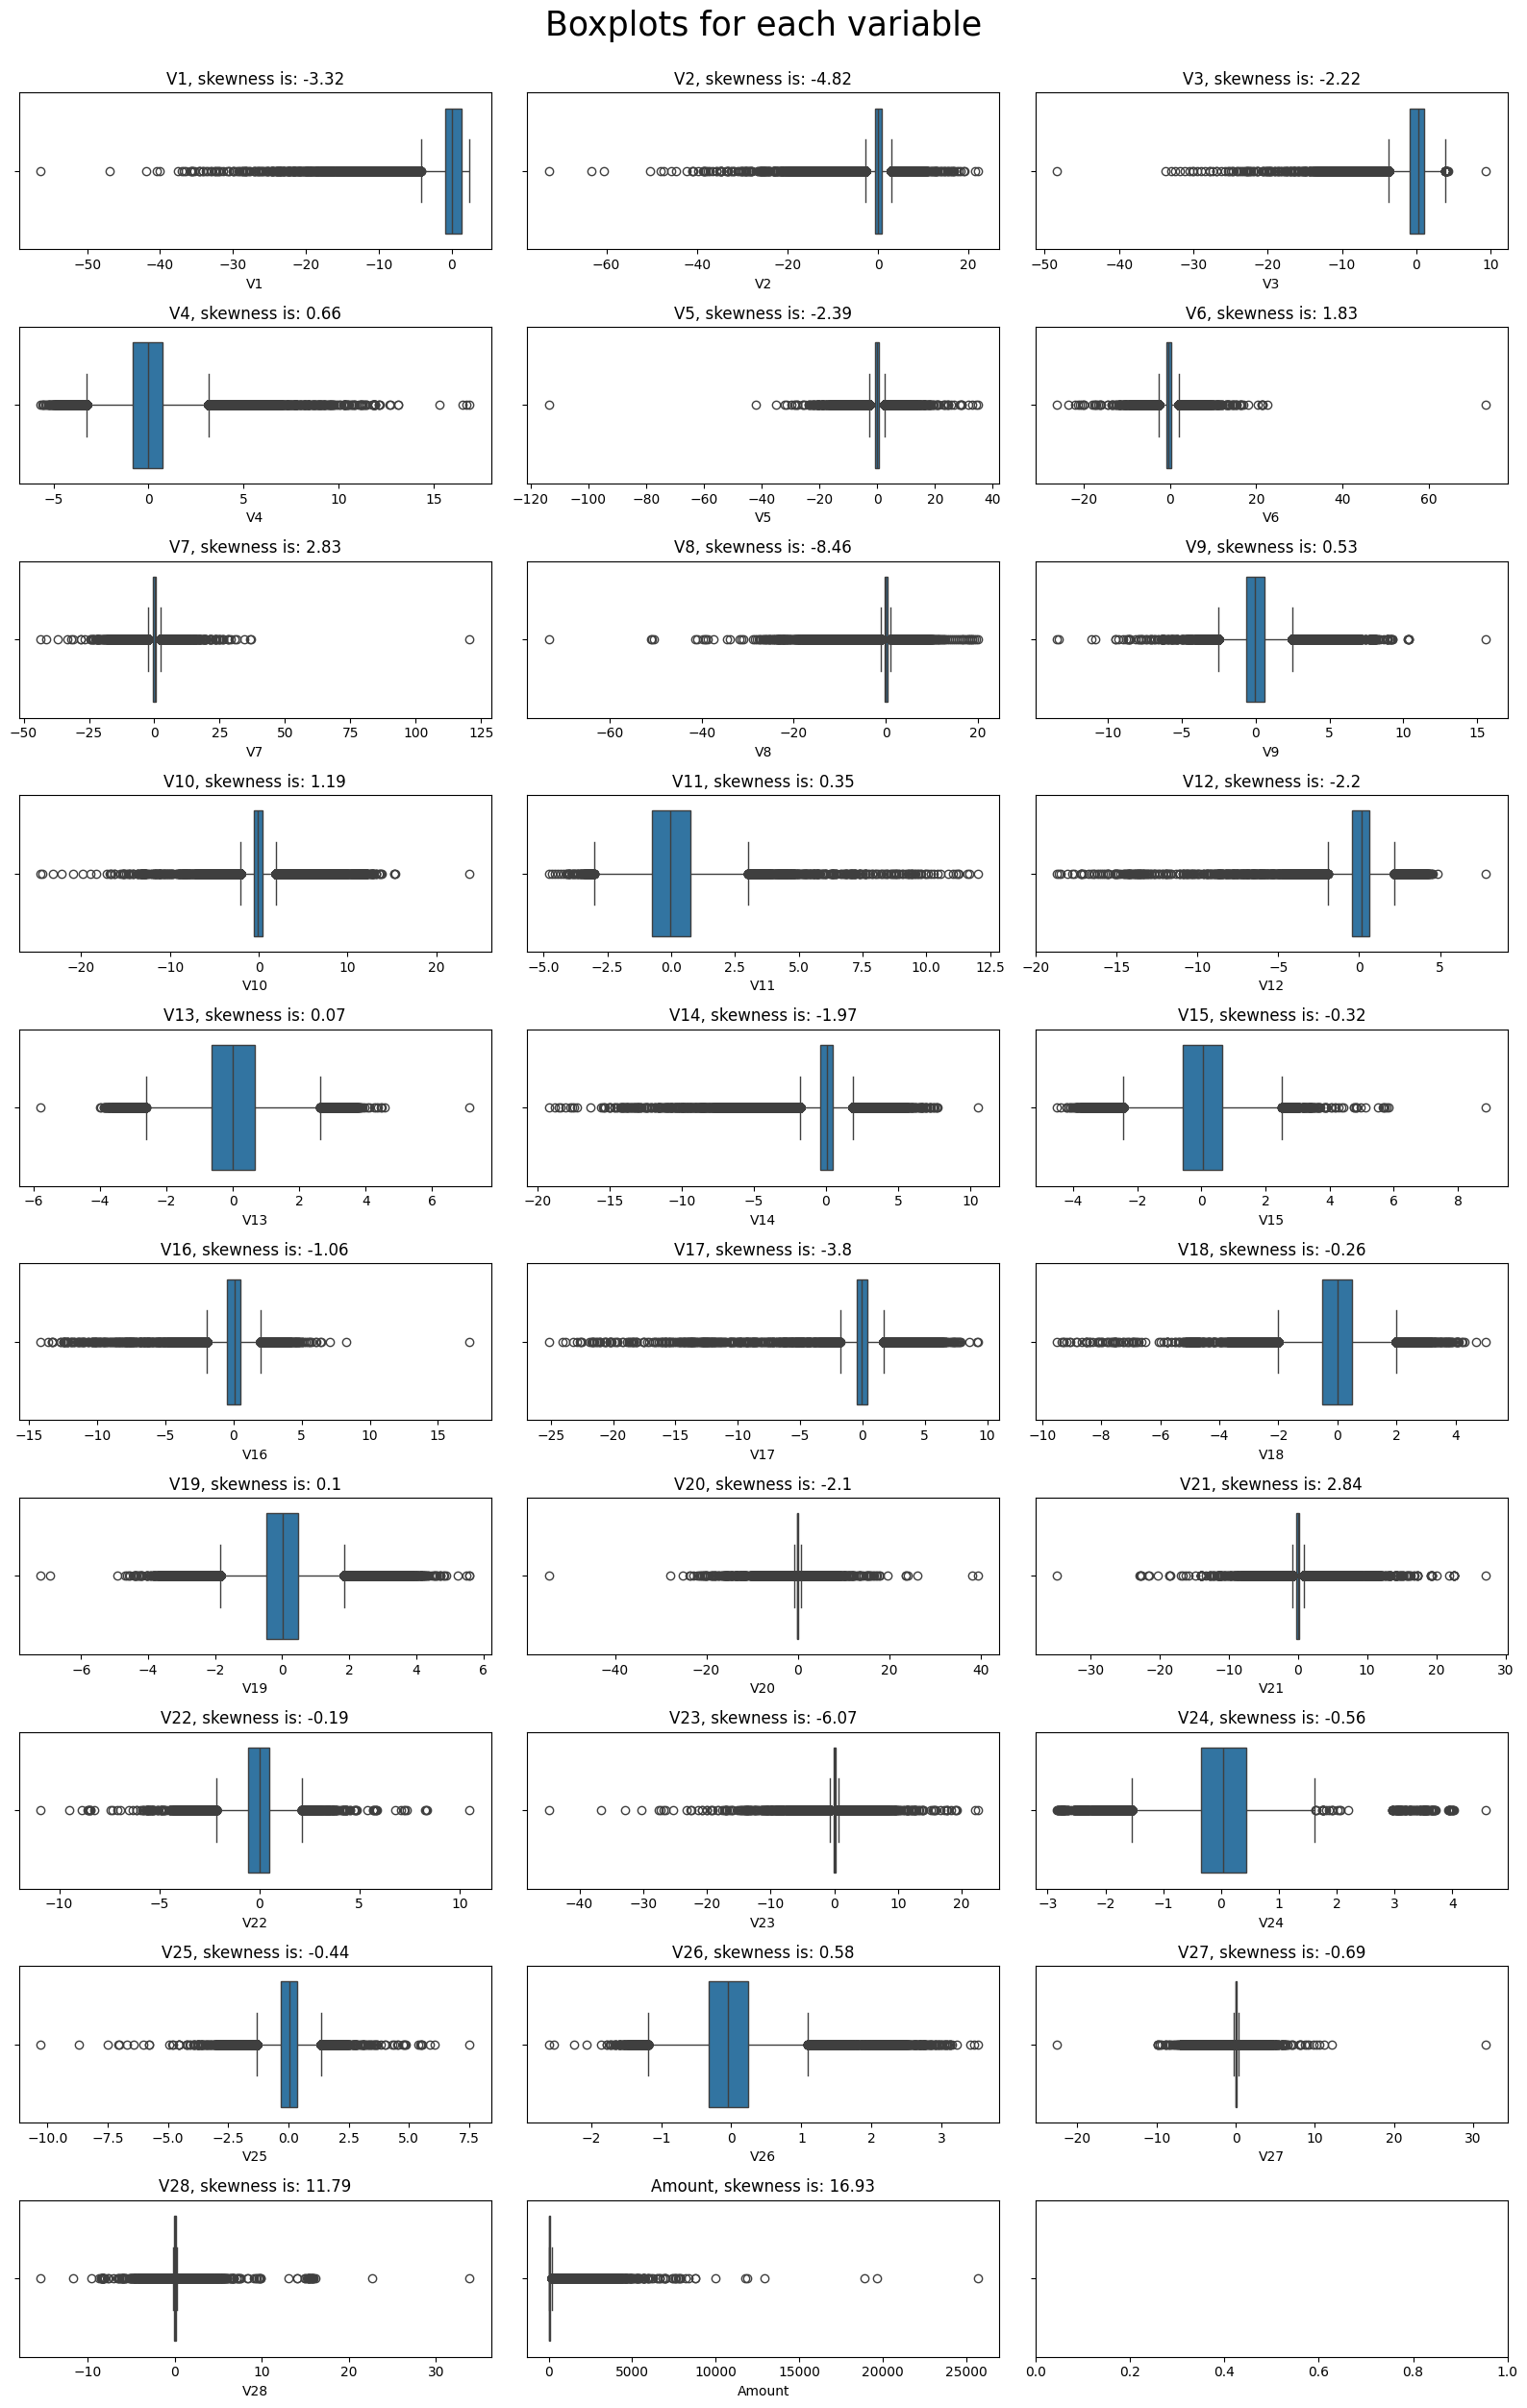

In [ ]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

### Inter Quartile Range (IQR)

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [ ]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


<ipython-input-17-1de1e48ff69f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




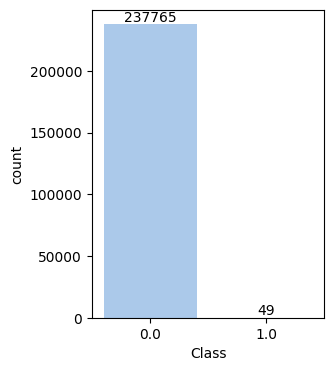

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

## Stratified splitting

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

ValueError: Input y contains NaN.

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [ ]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

## Cross-validation

## Oversample/undersample and Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

## Optimising for Recall

In [ ]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.8030303  0.74242424 0.76119403 0.87878788 0.65151515]
Average Cross Validation Recall score: 0.7673903211216644


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed for convergence
svm = SVC(random_state=42)  # Support Vector Machine
knn = KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors
dt = DecisionTreeClassifier(random_state=42)


# Train models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)  # Training SVM
knn.fit(X_train, y_train)  # Training KNN
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

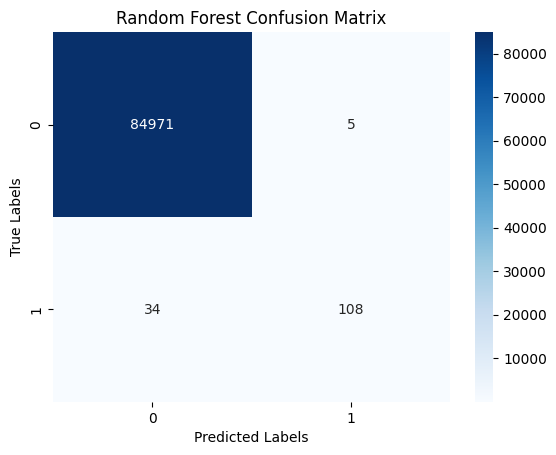

Random Forest Confusion Matrix:
[[84971     5]
 [   34   108]]



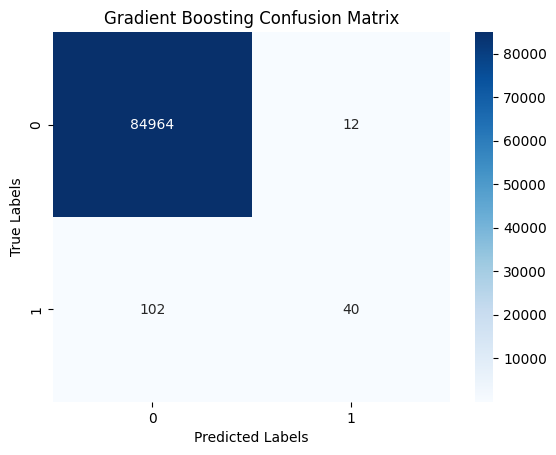

Gradient Boosting Confusion Matrix:
[[84964    12]
 [  102    40]]



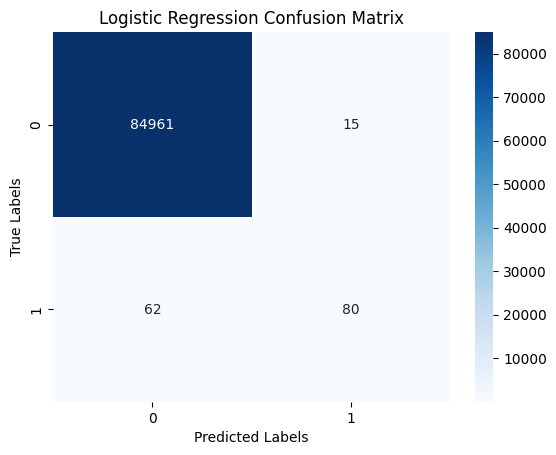

Logistic Regression Confusion Matrix:
[[84961    15]
 [   62    80]]



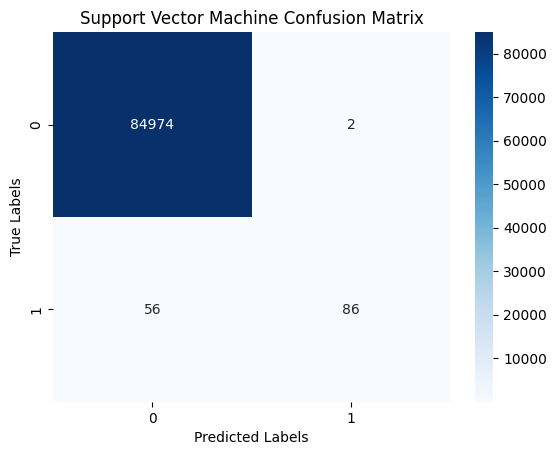

Support Vector Machine Confusion Matrix:
[[84974     2]
 [   56    86]]



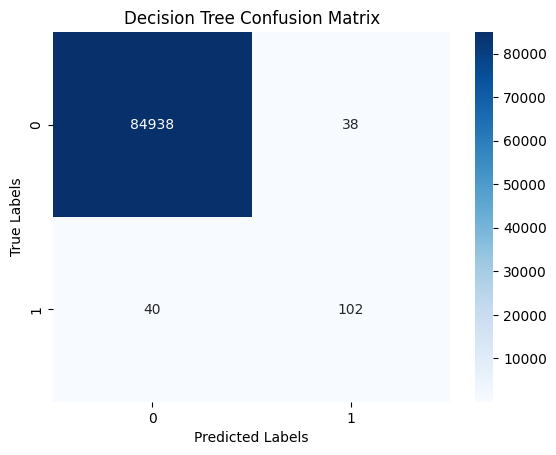

Decision Tree Confusion Matrix:
[[84938    38]
 [   40   102]]

             Description                   Model    Recall  Precision  \
0  No Under/Oversampling           Random Forest  0.760563   0.955752   
1  No Under/Oversampling       Gradient Boosting  0.281690   0.769231   
2  No Under/Oversampling     Logistic Regression  0.563380   0.842105   
3  No Under/Oversampling  Support Vector Machine  0.605634   0.977273   
4  No Under/Oversampling           Decision Tree  0.718310   0.728571   

   F1 Score  Accuracy  
0  0.847059  0.999542  
1  0.412371  0.998661  
2  0.675105  0.999095  
3  0.747826  0.999319  
4  0.723404  0.999084  


In [ ]:
# Update the models dictionary to include SVM and KNN
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Logistic Regression': lr,
    'Support Vector Machine': svm,  # Add SVM
    'Decision Tree': dt
}

scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append((name, recall, precision, f1, accuracy))

    # Visualization of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print(f"{name} Confusion Matrix:\n{cm}\n")

# Convert scores to DataFrame
scores_df = pd.DataFrame(scores, columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy'])

# Optional: Add a description to the DataFrame
scores_df.insert(0, 'Description', 'No Under/Oversampling')
print(scores_df)

## Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### Imbalanced-Learn Pipeline

### Training model

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.73      0.83       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118




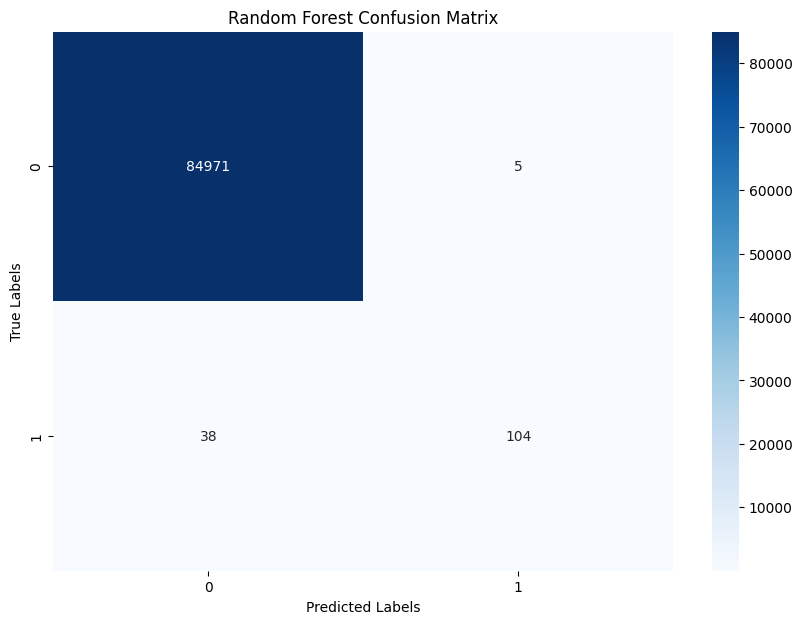

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.19      0.86      0.32       142

    accuracy                           0.99     85118
   macro avg       0.60      0.93      0.66     85118
weighted avg       1.00      0.99      1.00     85118




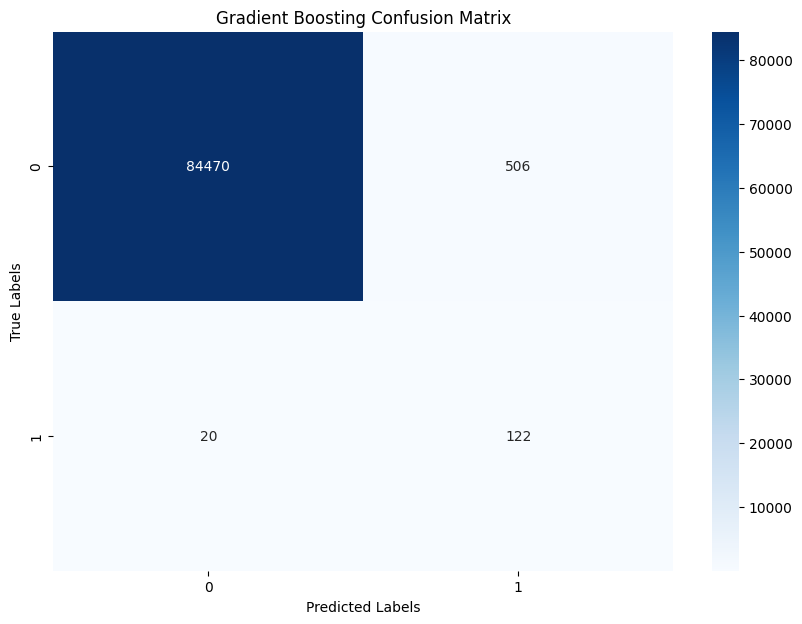

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.06      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.97      0.99     85118




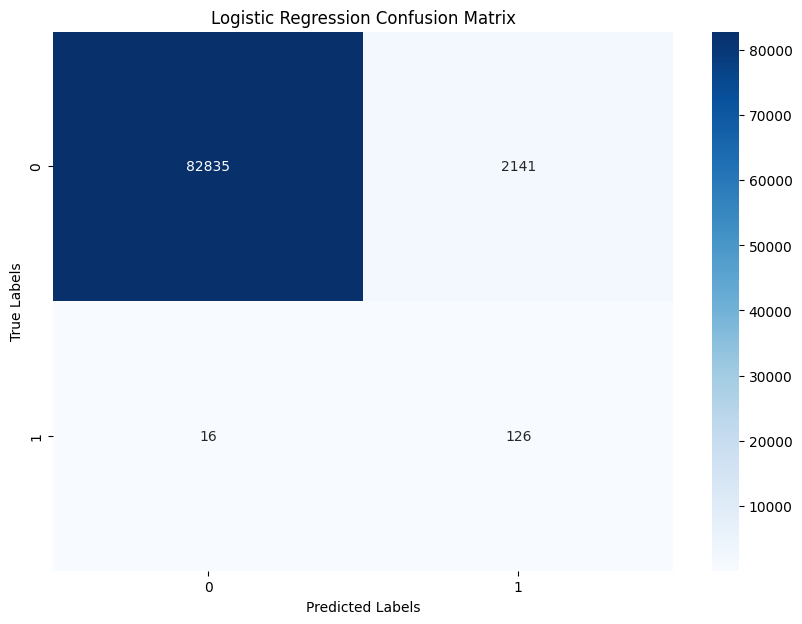

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.09      0.87      0.17       142

    accuracy                           0.99     85118
   macro avg       0.55      0.93      0.58     85118
weighted avg       1.00      0.99      0.99     85118




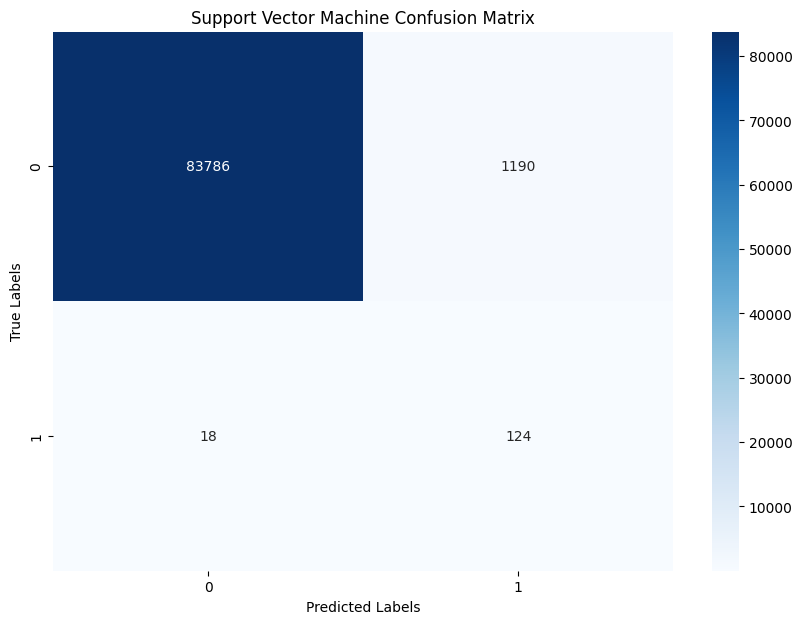

Classification Report for Decision_Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.78      0.71      0.75       142

    accuracy                           1.00     85118
   macro avg       0.89      0.86      0.87     85118
weighted avg       1.00      1.00      1.00     85118




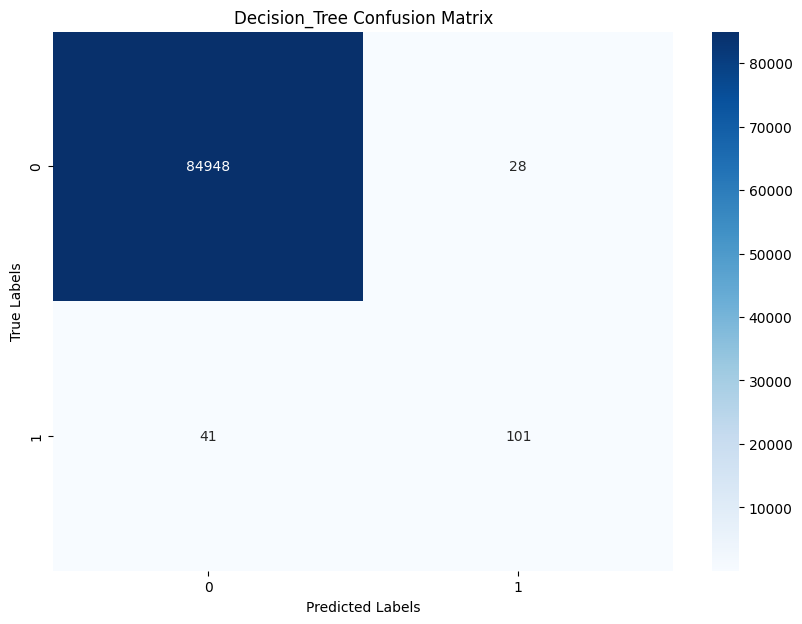

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import for Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # Import for K-Nearest Neighbors

# Define the pipelines
random_forest_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=13)
)

gradient_boosting_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=13)
)

logistic_regression_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    LogisticRegression(random_state=13, max_iter=1000)
)

# Adding SVM and KNN pipelines
svm_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    SVC(random_state=13)
)

Decision_Tree_pipeline = make_pipeline(
    RandomOverSampler(random_state=42),
    DecisionTreeClassifier()
)

# Train and evaluate each pipeline
pipelines = {
    'Random Forest': random_forest_pipeline,
    'Gradient Boosting': gradient_boosting_pipeline,
    'Logistic Regression': logistic_regression_pipeline,
    'Support Vector Machine': svm_pipeline,  # Add SVM pipeline
    'Decision_Tree': Decision_Tree_pipeline       # Add KNN pipeline
}

for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualization of the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


## Random Undersampling Imbalanced Datasets

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118




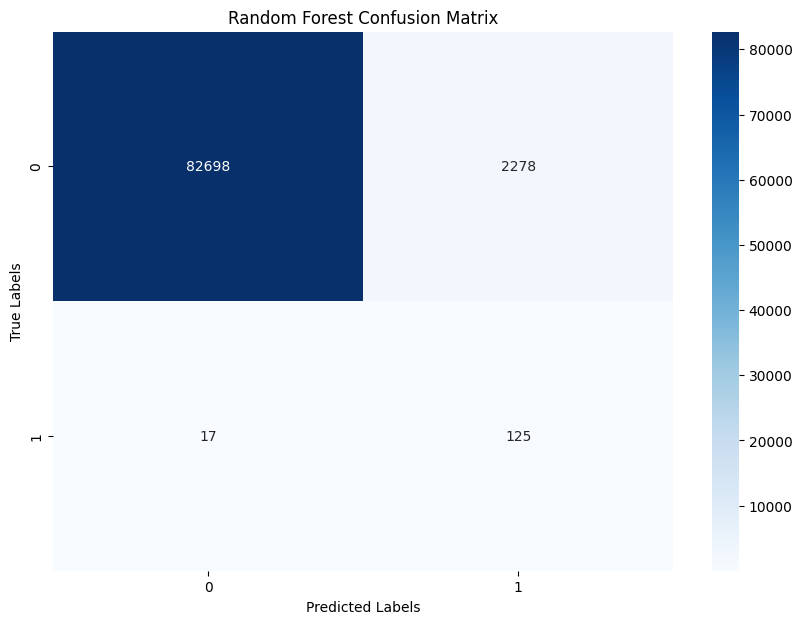

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.03      0.89      0.06       142

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.52     85118
weighted avg       1.00      0.96      0.98     85118




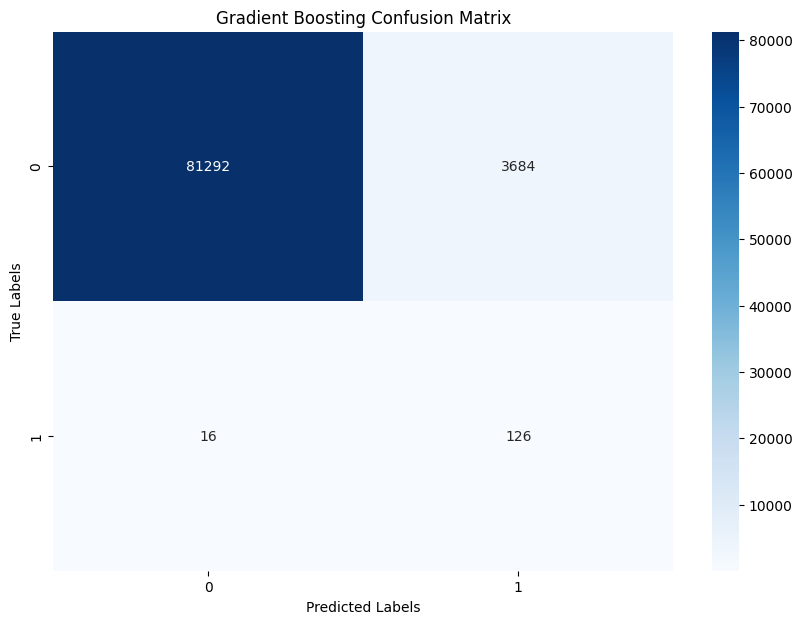

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.04      0.88      0.07       142

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.52     85118
weighted avg       1.00      0.96      0.98     85118




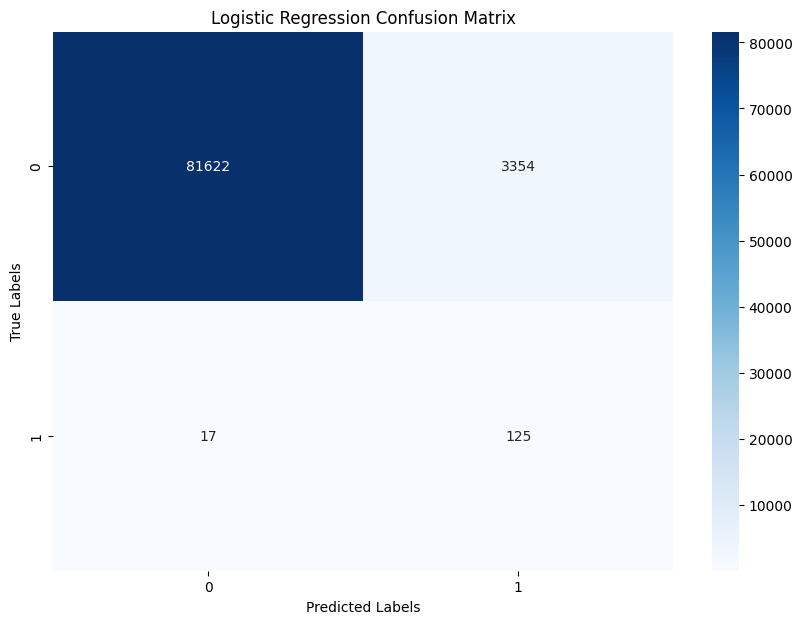

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.08      0.87      0.15       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.57     85118
weighted avg       1.00      0.98      0.99     85118




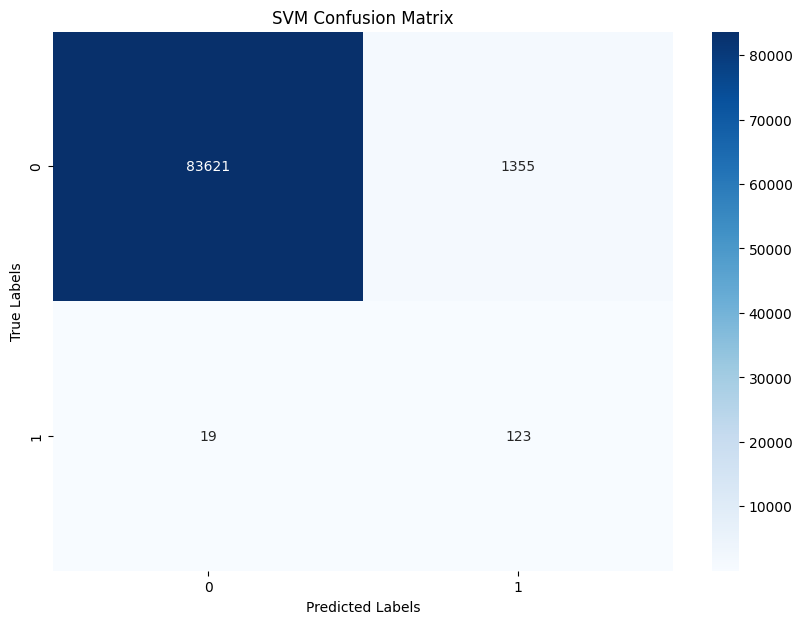

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     84976
           1       0.02      0.89      0.03       142

    accuracy                           0.92     85118
   macro avg       0.51      0.90      0.50     85118
weighted avg       1.00      0.92      0.95     85118




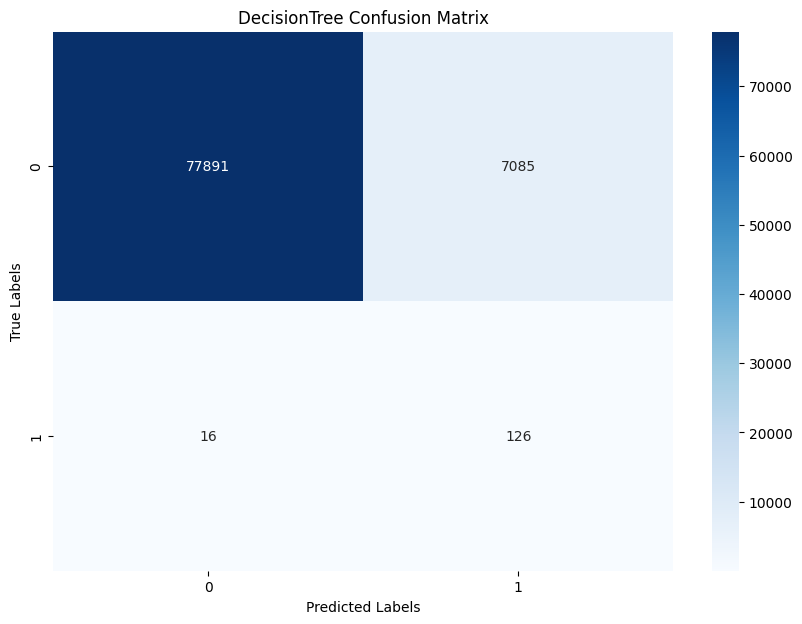

In [ ]:
# Now, define your models (without pipelines since we're not using oversampling here)
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=13),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=13),
    'Logistic Regression': LogisticRegression(random_state=13, max_iter=1000),
    'SVM': SVC(random_state=13),
    'DecisionTree': DecisionTreeClassifier(random_state=13,)
}

# Train and evaluate each model on the undersampled data
for name, model in models.items():
    # Train the model on the undersampled data
    model.fit(X_under, y_under)

    # Predict on the original test set
    y_pred = model.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualization of the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# SMOTE (Synthetic Minority Oversampling Technique)

## Training model

In [ ]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the pipelines with SMOTE
pipelines_smote = {
    'Random Forest SMOTE': make_pipeline(SMOTE(random_state=42),
                                         RandomForestClassifier(n_estimators=100, random_state=13)),
    'Gradient Boosting SMOTE': make_pipeline(SMOTE(random_state=42),
                                             GradientBoostingClassifier(n_estimators=100, random_state=13)),
    'Logistic Regression SMOTE': make_pipeline(SMOTE(random_state=42),
                                               LogisticRegression(random_state=13, max_iter=1000)),
    'SVM': make_pipeline(SMOTE(random_state=42),
                               SVC(random_state=13)),
    'DecisionTree': make_pipeline(SMOTE(random_state=42),
                                  DecisionTreeClassifier(random_state=13))
}

Evaluating SMOTE Models

Classification Report for Random Forest SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.75      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118




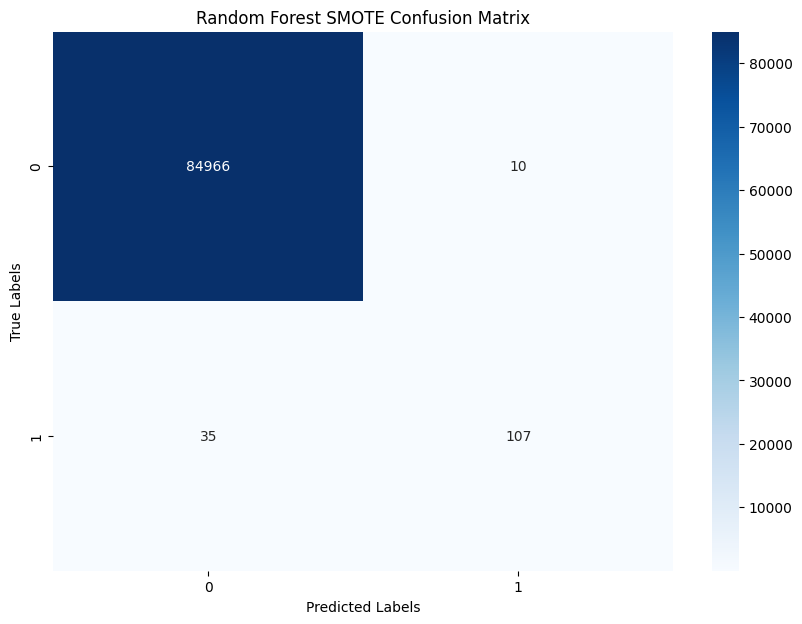

Classification Report for Gradient Boosting SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.11      0.87      0.20       142

    accuracy                           0.99     85118
   macro avg       0.56      0.93      0.60     85118
weighted avg       1.00      0.99      0.99     85118




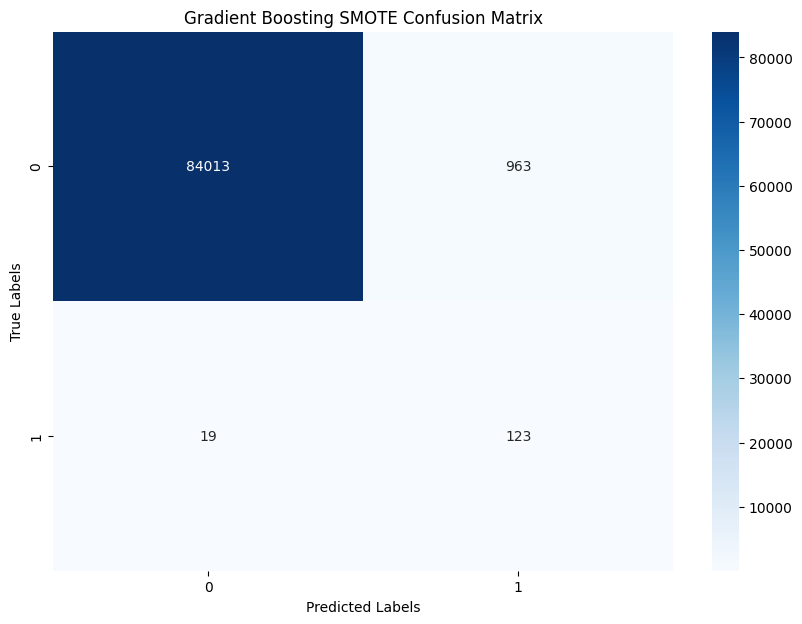

Classification Report for Logistic Regression SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118




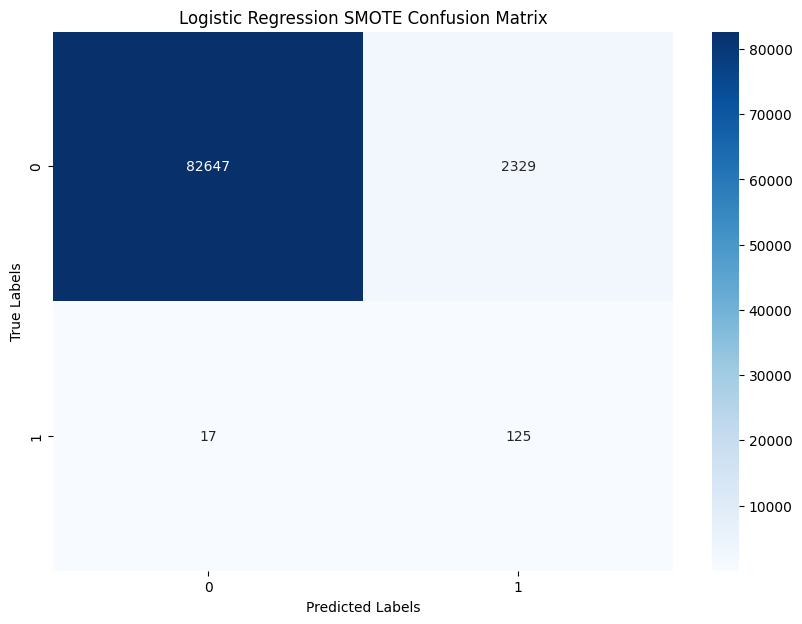

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.08      0.87      0.15       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.57     85118
weighted avg       1.00      0.98      0.99     85118




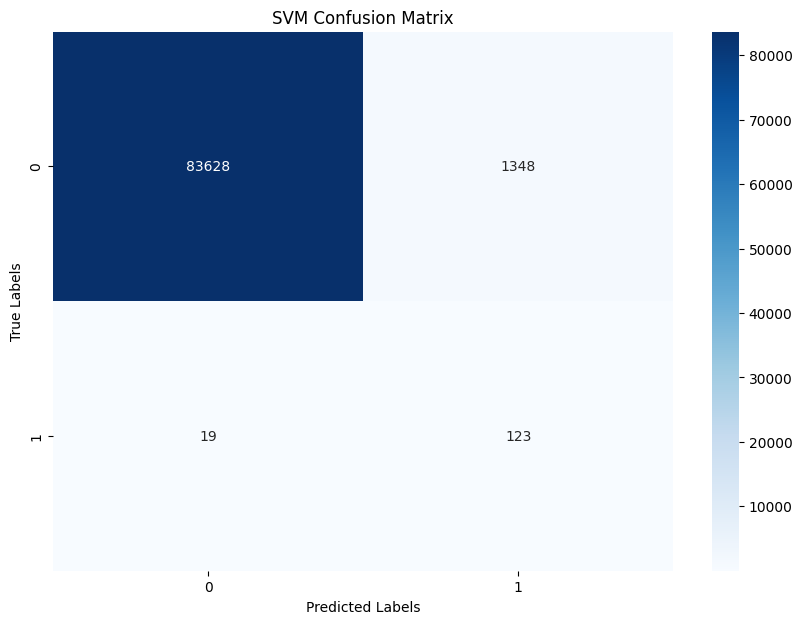

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.36      0.72      0.48       142

    accuracy                           1.00     85118
   macro avg       0.68      0.86      0.74     85118
weighted avg       1.00      1.00      1.00     85118




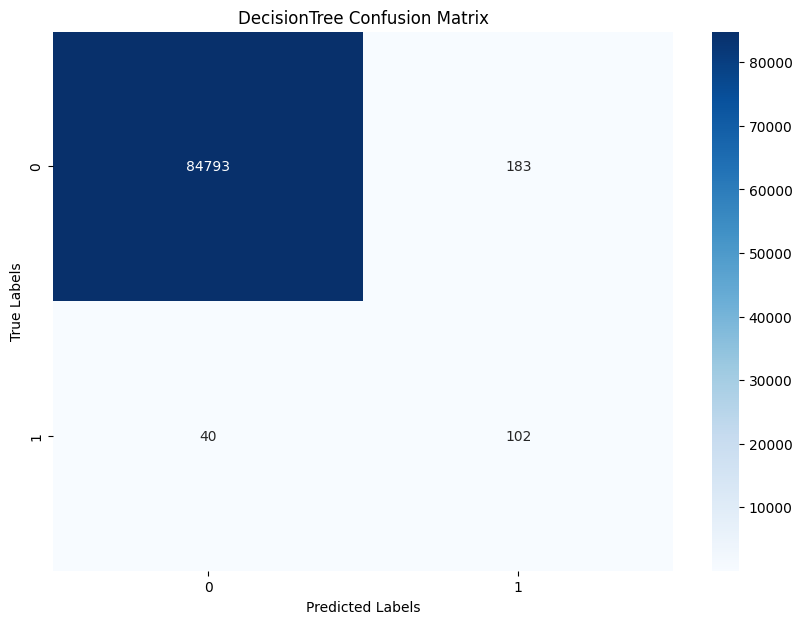

In [ ]:
# Function to train and print classification report
def train_and_evaluate(pipelines):
    for name, pipeline in pipelines.items():
        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Print the classification report
        print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

        # Generate and plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Train and evaluate SMOTE models
print("Evaluating SMOTE Models\n")
train_and_evaluate(pipelines_smote)


# Undersampling using Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

Genuine: 198259 / 99.83 % of the dataset
Frauds: 331 / 0.17 % of the dataset


In [ ]:
# Define the pipelines incorporating Tomek Links for under-sampling
pipelines_tomek = {
    'Random Forest Tomek': make_pipeline(TomekLinks(),
                                         RandomForestClassifier(n_estimators=100, random_state=13)),
    'Gradient Boosting Tomek': make_pipeline(TomekLinks(),
                                             GradientBoostingClassifier(n_estimators=100, random_state=13)),
    'Logistic Regression Tomek': make_pipeline(TomekLinks(),
                                               LogisticRegression(random_state=13, max_iter=1000)),
    'SVM': make_pipeline(TomekLinks(),
                         SVC(random_state=13)),
    'Decision_Tree': make_pipeline(TomekLinks(),
                                   DecisionTreeClassifier(random_state=13))
}


Evaluating Models with Tomek Links

Classification Report for Random Forest Tomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118




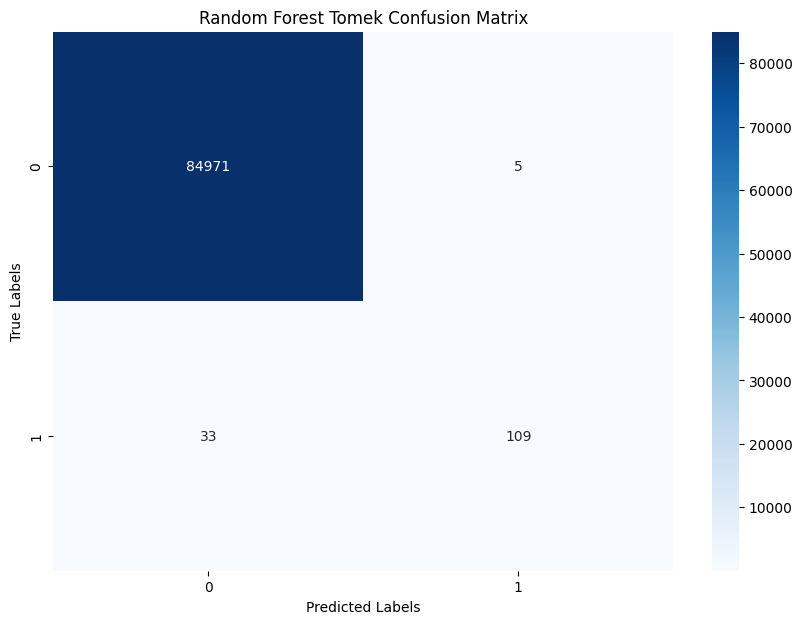

Classification Report for Gradient Boosting Tomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.71      0.27      0.40       142

    accuracy                           1.00     85118
   macro avg       0.85      0.64      0.70     85118
weighted avg       1.00      1.00      1.00     85118




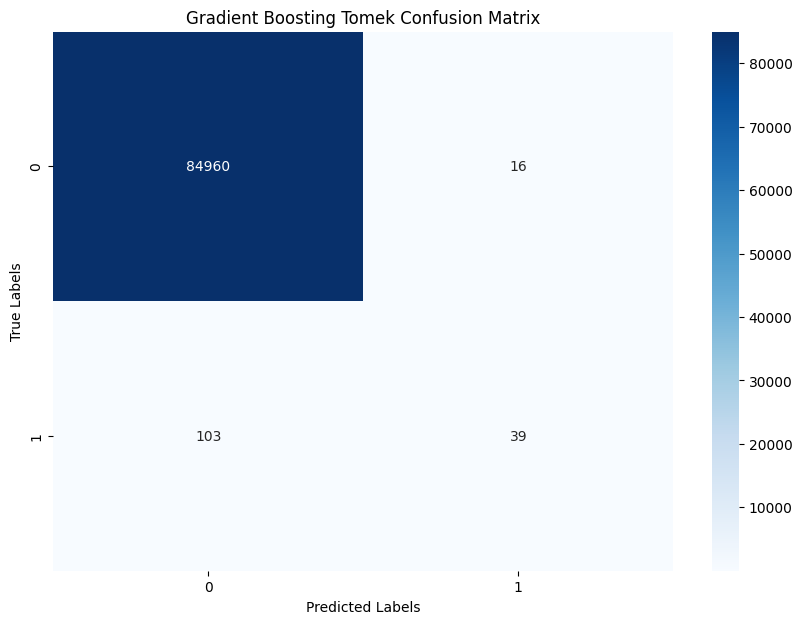

Classification Report for Logistic Regression Tomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.85      0.58      0.69       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118




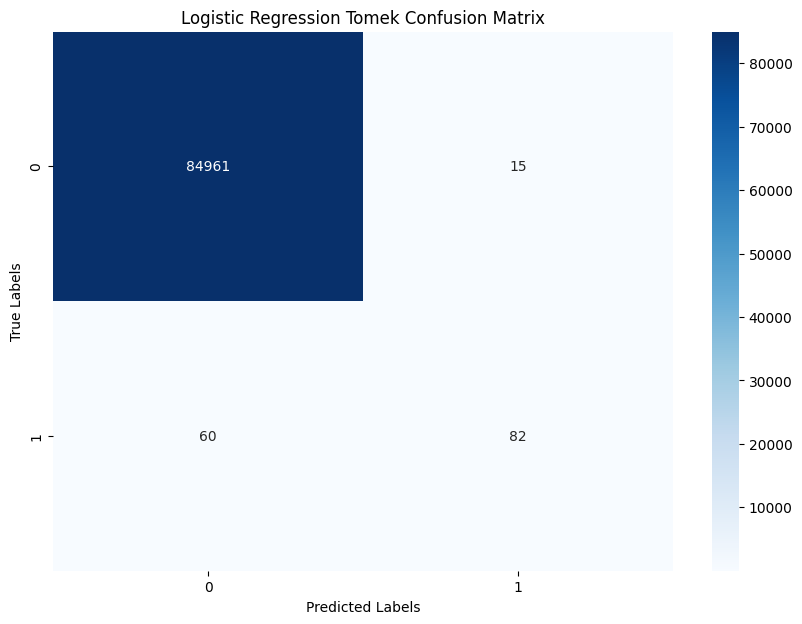

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.97      0.64      0.77       142

    accuracy                           1.00     85118
   macro avg       0.98      0.82      0.89     85118
weighted avg       1.00      1.00      1.00     85118




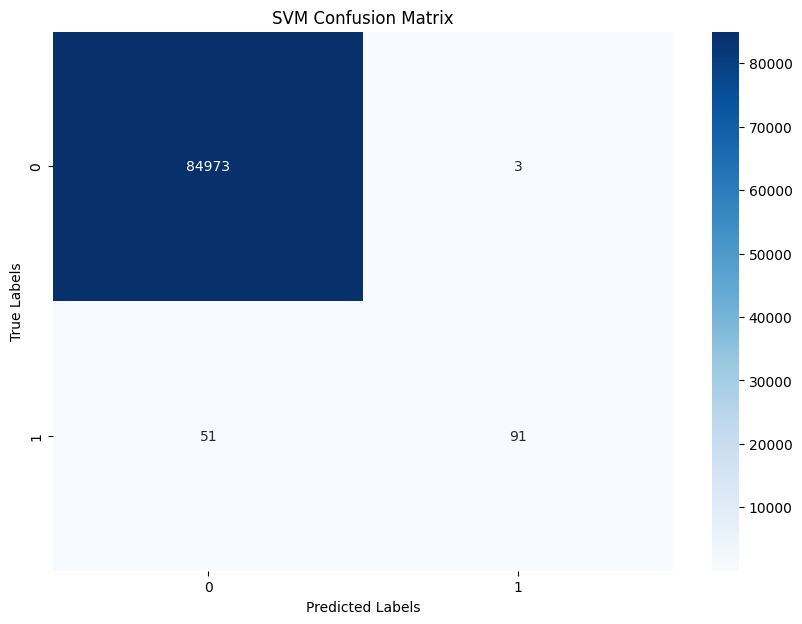

Classification Report for Decision_Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.77      0.72      0.74       142

    accuracy                           1.00     85118
   macro avg       0.88      0.86      0.87     85118
weighted avg       1.00      1.00      1.00     85118




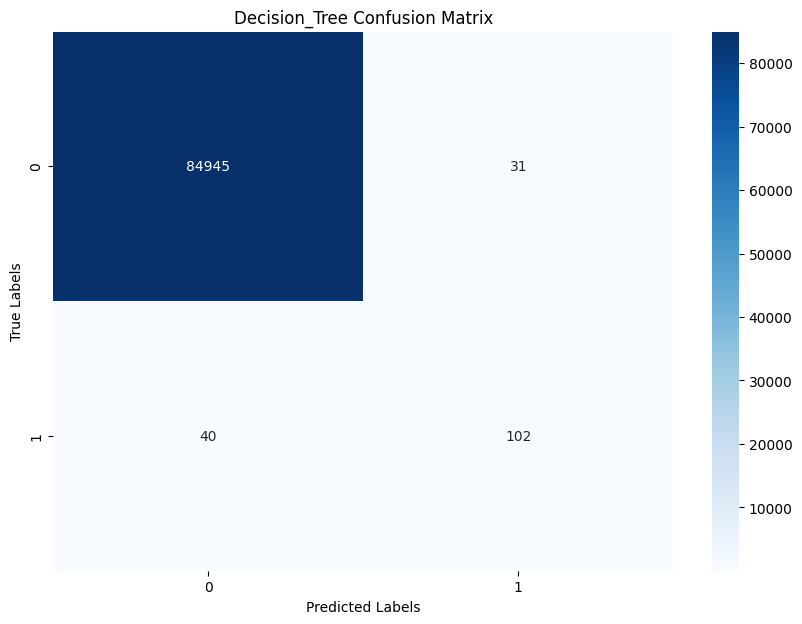

In [ ]:
# Function to train and evaluate pipelines
def train_and_evaluate(pipelines):
    for name, pipeline in pipelines.items():
        # Train the model on the training set
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Output the classification report
        print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

        # Generate and plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Evaluate models with Tomek Links under-sampling
print("Evaluating Models with Tomek Links\n")
train_and_evaluate(pipelines_tomek)


# Combining SMOTE and Tomek Links

## Training model

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:

pipelines_smotetomek = {
    'Random Forest SMOTETomek': make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                              RandomForestClassifier(n_estimators=100, random_state=13)),
    'Gradient Boosting SMOTETomek': make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                                  GradientBoostingClassifier(n_estimators=100, random_state=13)),
    'Logistic Regression SMOTETomek': make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                                    LogisticRegression(random_state=13, max_iter=1000)),
    'SVM': make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                                    SVC(random_state=13, probability=True)),
    'Decison_Tree': make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                                    DecisionTreeClassifier(random_state=13)),
}


Evaluating Models with SMOTETomek

Classification Report for Random Forest SMOTETomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.75      0.82       142

    accuracy                           1.00     85118
   macro avg       0.95      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118




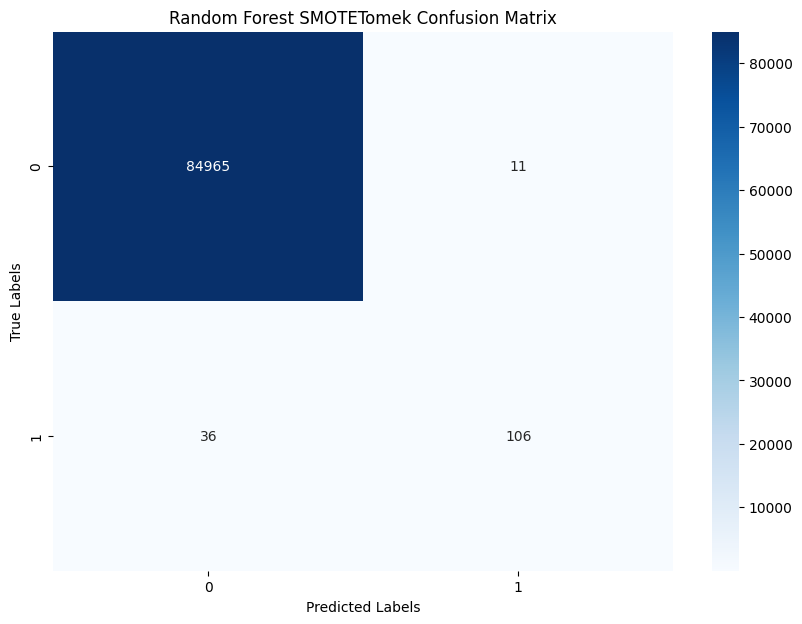

Classification Report for Gradient Boosting SMOTETomek:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.11      0.87      0.20       142

    accuracy                           0.99     85118
   macro avg       0.56      0.93      0.60     85118
weighted avg       1.00      0.99      0.99     85118




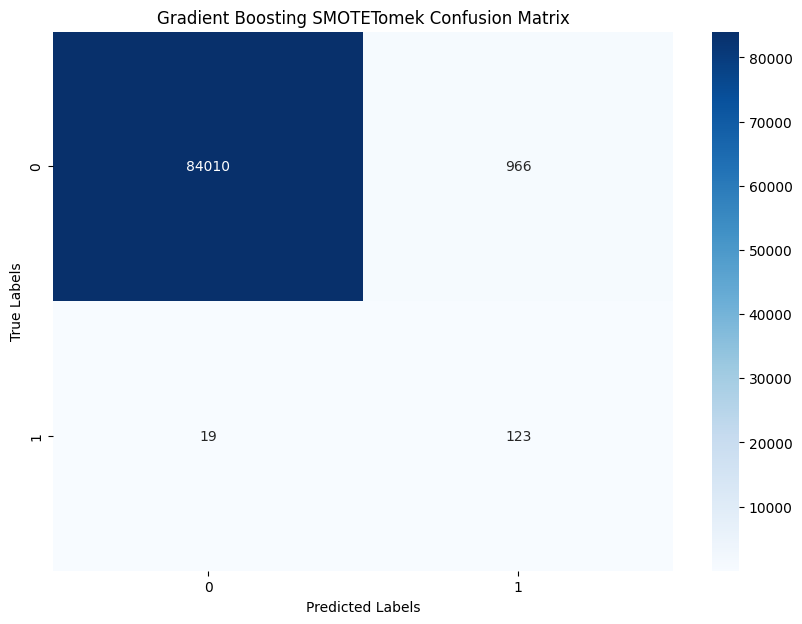

Classification Report for Logistic Regression SMOTETomek:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118




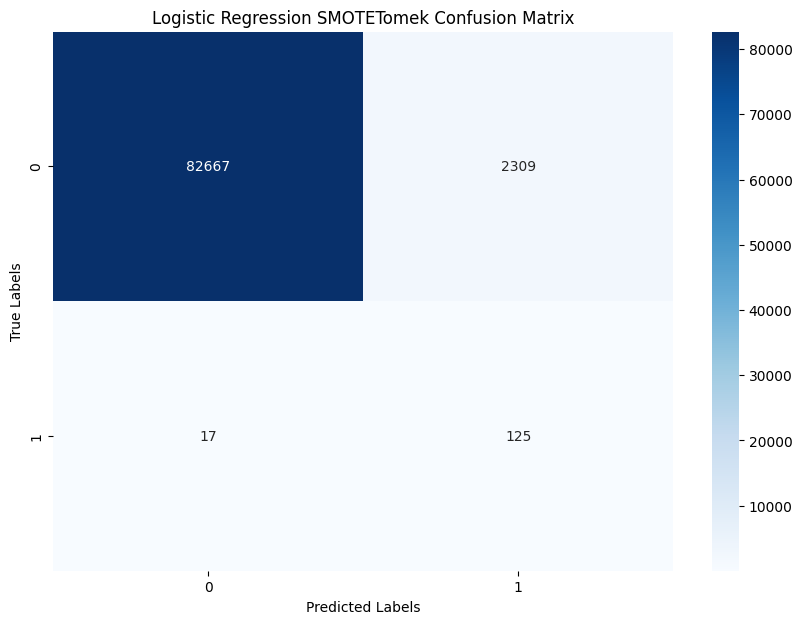

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.09      0.87      0.16       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.57     85118
weighted avg       1.00      0.98      0.99     85118




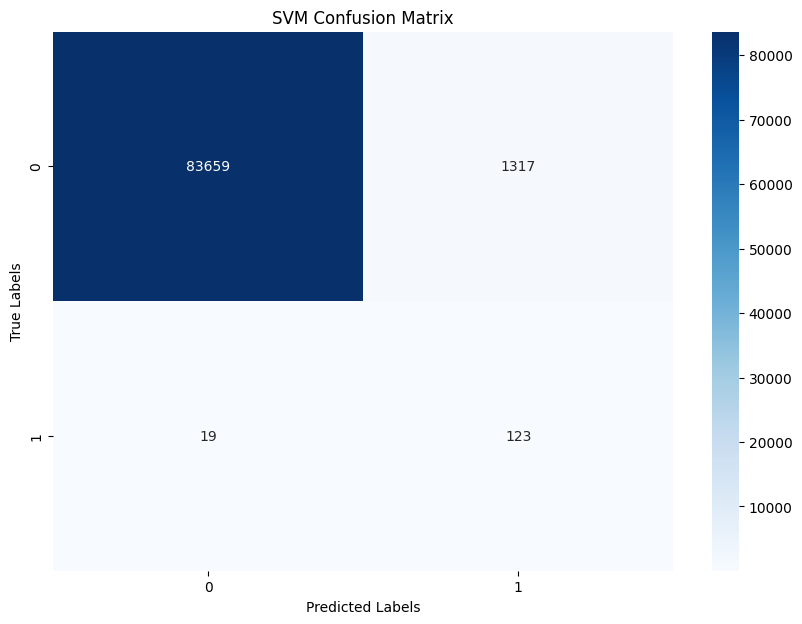

Classification Report for Decison_Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.36      0.70      0.48       142

    accuracy                           1.00     85118
   macro avg       0.68      0.85      0.74     85118
weighted avg       1.00      1.00      1.00     85118




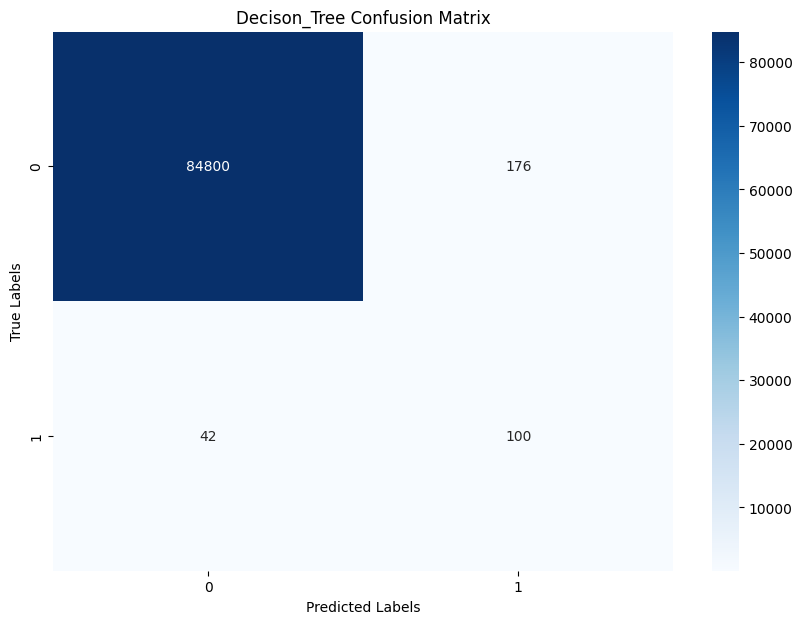

In [ ]:
# Function to train and evaluate pipelines
def train_and_evaluate(pipelines):
    for name, pipeline in pipelines.items():
        # Train the model on the training set
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Output the classification report
        print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

        # Generate and plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Evaluate models with SMOTETomek
print("Evaluating Models with SMOTETomek\n")
train_and_evaluate(pipelines_smotetomek)


# Performance comparison

Evaluating Models with SMOTETomek and plotting ROC Curves



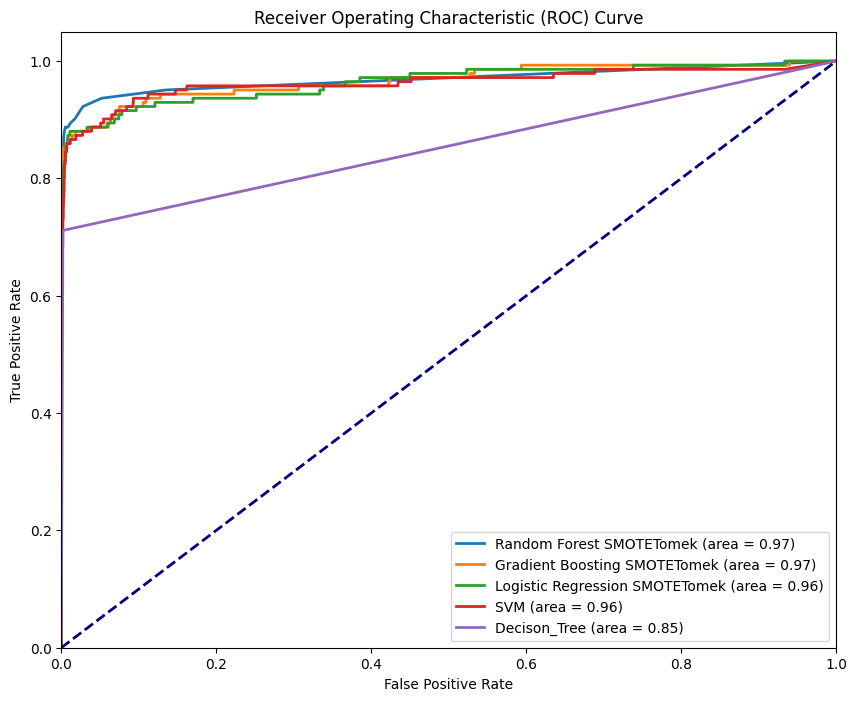

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


def train_and_evaluate_and_plot_roc(pipelines, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, pipeline in pipelines.items():
        # Train the model on the training set
        pipeline.fit(X_train, y_train)

        # Predict probabilities for the test set
        y_probs = pipeline.predict_proba(X_test)[:, 1]  # get the probability of the positive class

        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming pipelines_smotetomek is already defined
print("Evaluating Models with SMOTETomek and plotting ROC Curves\n")
train_and_evaluate_and_plot_roc(pipelines_smotetomek, X_train, y_train, X_test, y_test)


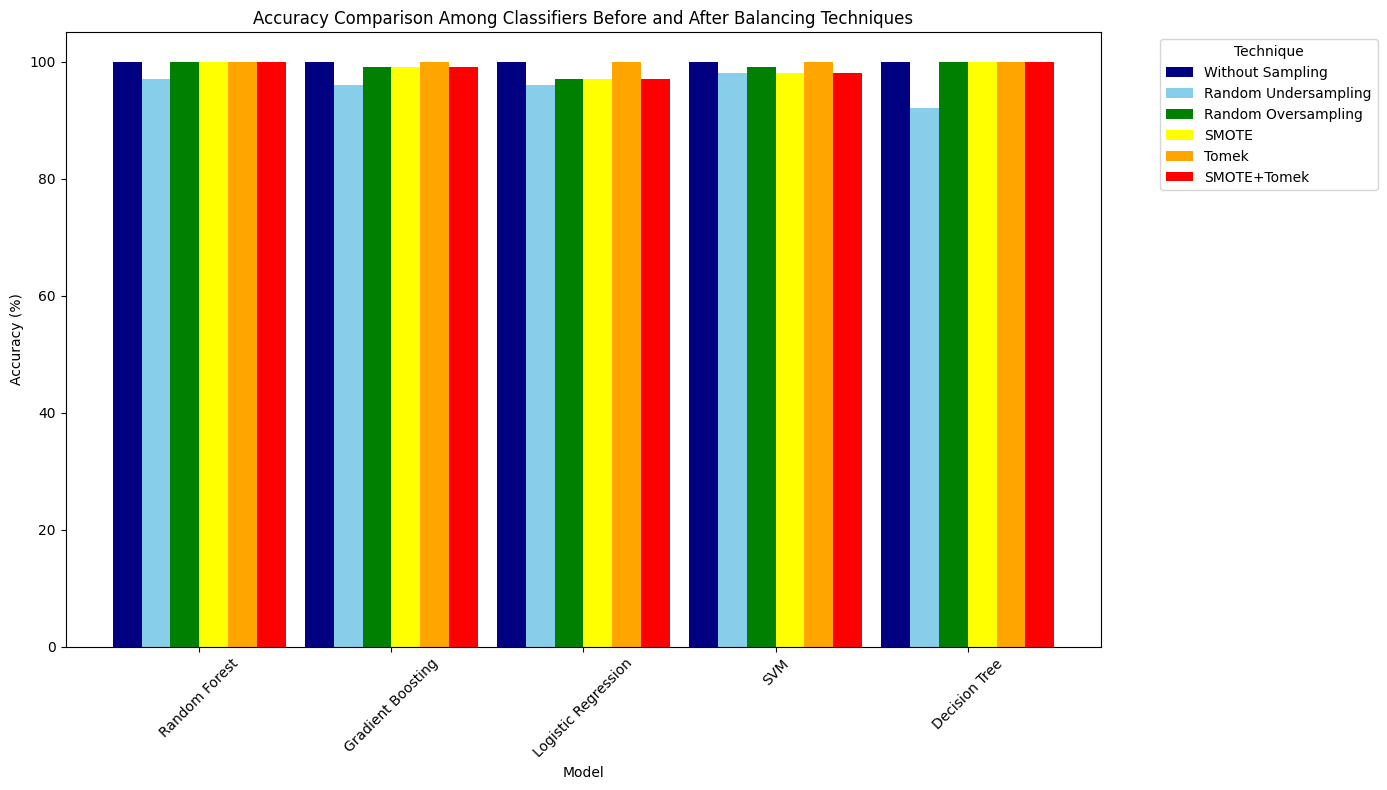

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Decision Tree']
without_sampling = [99.95, 99.87, 99.93, 99.95, 99.91]
random_undersampling = [97.00, 96.00, 96.00, 98.00, 92.00]
random_oversampling = [100.00, 99.00, 97.00, 99.00, 100.00]
smote = [100.00, 99.00, 97.00, 98.00, 100.00]
tomek = [100.00, 100.00, 100.00, 100.00, 100.00]
smote_tomek = [100.00, 99.00, 97.00, 98.00, 100.00]

# Number of groups and bar width
num_groups = len(models)
bar_width = 0.15

# Indices for the bar positions
indices = np.arange(num_groups)

# Colors for the bars
colors = ['navy', 'skyblue', 'green', 'yellow', 'orange', 'red']

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars for each technique
ax.bar(indices, without_sampling, bar_width, color=colors[0], label='Without Sampling')
ax.bar(indices + bar_width, random_undersampling, bar_width, color=colors[1], label='Random Undersampling')
ax.bar(indices + 2 * bar_width, random_oversampling, bar_width, color=colors[2], label='Random Oversampling')
ax.bar(indices + 3 * bar_width, smote, bar_width, color=colors[3], label='SMOTE')
ax.bar(indices + 4 * bar_width, tomek, bar_width, color=colors[4], label='Tomek')
ax.bar(indices + 5 * bar_width, smote_tomek, bar_width, color=colors[5], label='SMOTE+Tomek')

# Set the title and labels
ax.set_title('Accuracy Comparison Among Classifiers Before and After Balancing Techniques')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')

# Set the position of the x ticks
ax.set_xticks(indices + 2.5 * bar_width)
ax.set_xticklabels(models)

# Rotate the x tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Place the legend outside of the plot on the right
ax.legend(title='Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('combined_accuracy_comparison_bar_chart_with_legend.png', bbox_inches='tight')
plt.show()


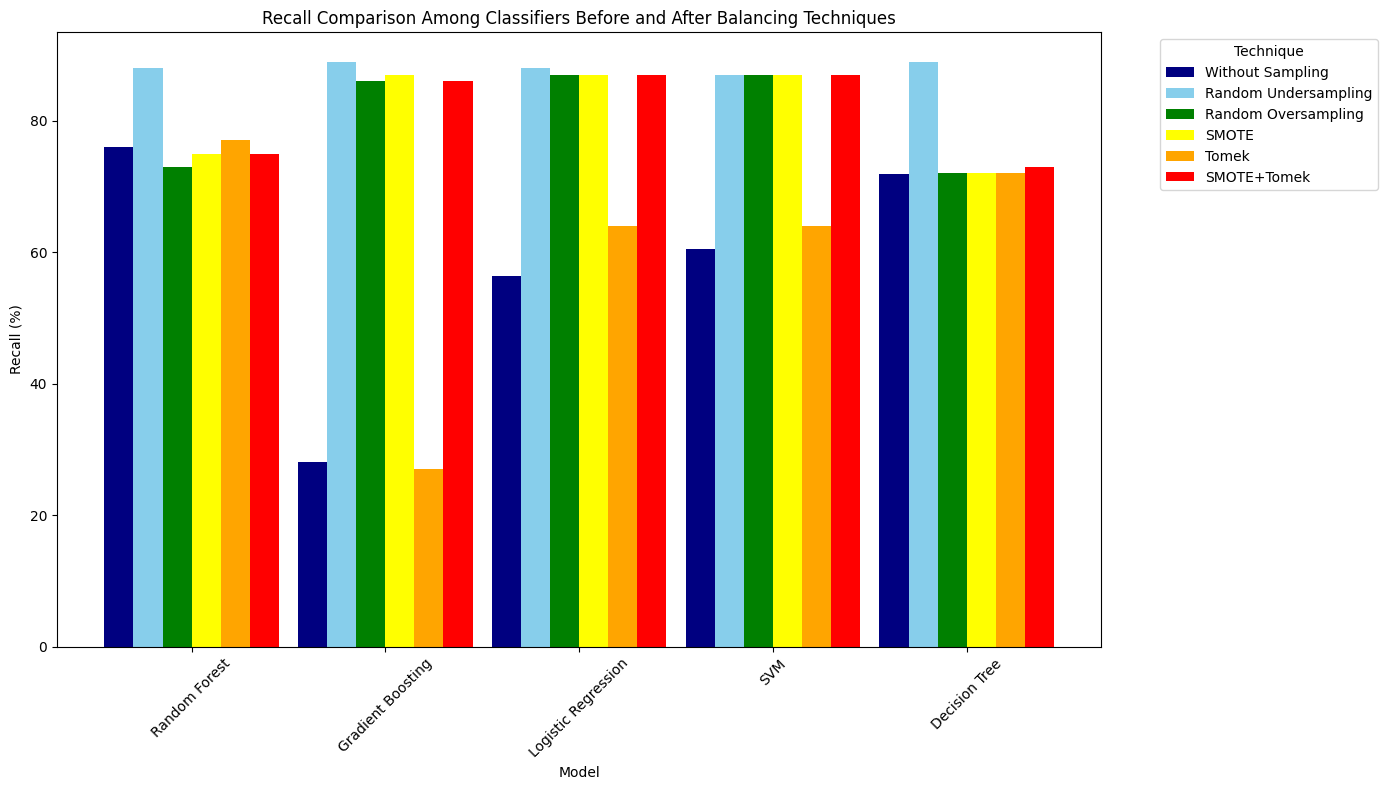

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Recall data from the provided table
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'SVM', 'Decision Tree']
without_sampling_recall = [76.06, 28.17, 56.34, 60.56, 71.83]
random_undersampling_recall = [88.00, 89.00, 88.00, 87.00, 89.00]
random_oversampling_recall = [73.00, 86.00, 87.00, 87.00, 72.00]
smote_recall = [75.00, 87.00, 87.00, 87.00, 72.00]
tomek_recall = [77.00, 27.00, 64.00, 64.00, 72.00]
smote_tomek_recall = [75.00, 86.00, 87.00, 87.00, 73.00]

# Set up the bar positions and width
num_models = len(models)
bar_width = 0.15
indices = np.arange(num_models)

# Start plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each recall data point
ax.bar(indices, without_sampling_recall, bar_width, label='Without Sampling', color='navy')
ax.bar(indices + bar_width, random_undersampling_recall, bar_width, label='Random Undersampling', color='skyblue')
ax.bar(indices + 2 * bar_width, random_oversampling_recall, bar_width, label='Random Oversampling', color='green')
ax.bar(indices + 3 * bar_width, smote_recall, bar_width, label='SMOTE', color='yellow')
ax.bar(indices + 4 * bar_width, tomek_recall, bar_width, label='Tomek', color='orange')
ax.bar(indices + 5 * bar_width, smote_tomek_recall, bar_width, label='SMOTE+Tomek', color='red')

# Set title and labels
ax.set_title('Recall Comparison Among Classifiers Before and After Balancing Techniques')
ax.set_xlabel('Model')
ax.set_ylabel('Recall (%)')

# Position the x ticks
ax.set_xticks(indices + 2.5 * bar_width)
ax.set_xticklabels(models)

# Rotate x tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# Place the legend outside of the plot on the right
ax.legend(title='Technique', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit the plot, legend and labels
plt.tight_layout()

# Save the plot as a PNG file
recall_plot_path = 'recall_comparison_bar_chart.png'
plt.savefig(recall_plot_path, bbox_inches='tight')

# Display the plot
plt.show()
